**APPLIANCES ENERGY PREDICTION**

**Project Title**: Appliances Energy Prediction

**Dataset Source**: UC Irvine Machine Learning Repository

**Date:**

**Author**: Anaswara.k.b

**Introduction**

This project is focused on predicting energy consumption using a dataset from the UC Irvine repository. Energy management is critical for optimizing resource usage, reducing costs, and minimizing environmental impact.This project aims to perform a comprehensive data analysis and build predictive models using the Energy dataset from UC Irvine. The focus is on understanding energy consumption patterns and predicting energy usage efficiently. By leveraging machine learning, we can predict future energy consumption based on various features such as temperature, humidity, and appliance usage. This project will involve data preprocessing, feature engineering, model building, and evaluation.

**Objective**

The main objective is to create a robust machine learning model capable of accurately predicting energy consumption based on features such as humidity, temperature, and lighting. Is to develop a machine learning model that predicts the energy consumption of appliances in a home or building. By analyzing the relationship between indoor and outdoor factors, the model will provide accurate forecasts of appliance energy usage. The model can be useful for energy management systems aimed at reducing waste and improving efficienc We aim to evaluate performance using metrics like accuracy, F1-score, and mean absolute error.

**Data Story**

The dataset used in this project comes from the UC Irvine Machine Learning Repository and is titled "Appliances Energy consumption". It contains measurements related to energy use in a household setting, with data collected over time. The main objective is to predict energy consumption (measured in Wh) using various environmental and appliance-related features.

Data Set:https://colab.research.google.com/drive/1DqZmNvhrP-wMUsWazMFKIgFxYWZV_MAB?usp=sharing

Key Features:

Appliances: The amount of energy (in Wh) consumed by household appliances. This is the target variable.

Lights: Energy consumption for lighting in the house.

Temperature features: There are several columns for temperature measurements from different rooms (e.g., kitchen, living room).

Humidity features: Multiple columns for humidity levels from different parts of the house.

Date: The timestamp for when the measurements were recorded.

Others: Other features such as visibility, wind speed, and pressure may influence energy consumption.

**Data Types**

Numerical features: Most of the columns are continuous numerical values (e.g., temperature, humidity).

Categorical features: Time-based columns, such as the Date, could be converted into categorical formats like day of the week or hour of the day to analyze energy use patterns over time.

**1.Loading the dataset**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### we load the dataset using pd.read_csv(), and then preview the data using the .head() function to view the first few rows of the dataset.

In [ ]:
df=pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,12-02-2016 13:20,220,0,20.600000,42.100000,19.426667,39.663333,21.426667,40.326667,19.200000,...,18.600000,39.700000,4.80,741.766667,70.666667,5.666667,40.000000,-0.2,45.063466,45.063466
4587,12-02-2016 13:30,390,0,20.633333,41.833333,19.390000,39.466667,21.390000,40.163333,19.200000,...,18.600000,39.826667,5.05,741.650000,69.500000,5.500000,40.000000,-0.2,46.974737,46.974737
4588,12-02-2016 13:40,190,0,20.700000,41.342500,19.390000,39.400000,21.390000,39.963333,19.260000,...,18.666667,40.100000,5.30,741.533333,68.333333,5.333333,40.000000,-0.2,19.980889,19.980889
4589,12-02-2016 13:50,480,0,20.700000,40.963333,19.426667,39.326667,21.290000,39.790000,19.290000,...,18.700000,40.433333,5.55,741.416667,67.166667,5.166667,40.000000,-0.2,48.197240,48.197240


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**2.Insights Explanation**

Once the data is loaded and previewed, the first few observations can provide some initial insights:

1.Data Overview: The dataset consists of numerical features related to household energy usage and environmental factors (e.g., temperature, humidity). The Appliances column is our target variable that we aim to predict.

2.Initial Structure: The dataset contains continuous numerical values for different features, which will likely need standardization or normalization for model building.

3.Date Feature: The Date column holds timestamps, which can be broken down into useful components such as the hour of the day or day of the week to study temporal patterns in energy usage.

4.Potential Challenges: We may need to handle missing data or outliers in the dataset, and feature selection will be important to improve model performance.

These initial insights help guide the next steps, such as data cleaning, transformation, and model building

**3.Describe the Data**

Let's first understand the dataset by looking at its structure and summary statistics using .info() and .describe().

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4591 non-null   object 
 1   Appliances   4591 non-null   int64  
 2   lights       4591 non-null   int64  
 3   T1           4591 non-null   float64
 4   RH_1         4591 non-null   float64
 5   T2           4591 non-null   float64
 6   RH_2         4591 non-null   float64
 7   T3           4591 non-null   float64
 8   RH_3         4591 non-null   float64
 9   T4           4591 non-null   float64
 10  RH_4         4591 non-null   float64
 11  T5           4591 non-null   float64
 12  RH_5         4591 non-null   float64
 13  T6           4591 non-null   float64
 14  RH_6         4591 non-null   float64
 15  T7           4591 non-null   float64
 16  RH_7         4591 non-null   float64
 17  T8           4591 non-null   float64
 18  RH_8         4591 non-null   float64
 19  T9    

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,...,4591.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000
mean,100.466129,5.606622,20.589800,43.032713,19.801745,42.024615,20.676879,43.115619,19.067829,43.329374,...,17.390371,45.185753,5.117067,756.169150,86.508715,5.273420,39.646296,2.935401,24.728414,24.728414
std,118.147099,9.495849,1.559716,2.990564,1.628741,2.608390,1.474128,2.236906,1.580683,3.485535,...,1.153414,3.920700,4.014610,8.763061,9.077838,2.784764,12.759955,4.031267,14.718853,14.718853
min,10.000000,0.000000,16.790000,32.023333,16.100000,30.160000,17.200000,35.030000,15.100000,35.090000,...,1.000000,34.730000,-5.000000,729.300000,51.000000,0.000000,2.000000,-6.600000,0.028526,0.028526
25%,40.000000,0.000000,19.390000,41.158333,18.600000,40.290000,19.730000,41.760000,18.200000,41.000000,...,16.633333,42.296250,2.805000,749.400000,81.500000,3.000000,29.000000,0.900000,12.041985,12.041985
50%,50.000000,0.000000,20.790000,43.290000,20.033333,42.290000,20.600000,43.590000,19.200000,43.466667,...,17.200000,45.663333,5.330000,758.200000,89.000000,5.000000,40.000000,3.270000,24.131789,24.131789
75%,100.000000,10.000000,21.790000,45.060000,21.000000,43.933333,21.700000,44.730000,20.200000,46.163333,...,18.390000,48.500000,8.350000,763.300000,93.333333,7.125000,43.000000,6.170000,37.950239,37.950239
max,1080.000000,70.000000,24.100000,63.360000,23.600000,50.260000,25.500000,50.163333,23.000000,51.090000,...,19.290000,53.326667,13.100000,770.700000,100.000000,14.000000,65.000000,10.700000,49.996530,49.996530


**4.Missing Values**

Checking for null values is important for handling missing data before training the model.



In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

RH_9           1
T_out          1
Press_mm_hg    1
RH_out         1
Windspeed      1
Visibility     1
Tdewpoint      1
rv1            1
rv2            1
dtype: int64


This output lists the columns in the dataset that contain missing values and the count of missing entries in each:

T_out: 1 missing value in the outdoor temperature column.
Press_mm_hg: 1 missing value in atmospheric pressure (measured in mmHg).
RH_out: 2 missing values in outdoor relative humidity.
Windspeed: 3 missing values in the wind speed data.
Visibility: 3 missing values in visibility data.
Tdewpoint: 3 missing values in the dew point temperature.
rv1 and rv2: 3 missing values each in columns likely representing additional numerical features.

**5.Handling Duplicates**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 0


**6.Outlier Detection**

Outliers can distort predictions in machine learning models. We'll use boxplots to detect and visualize them.

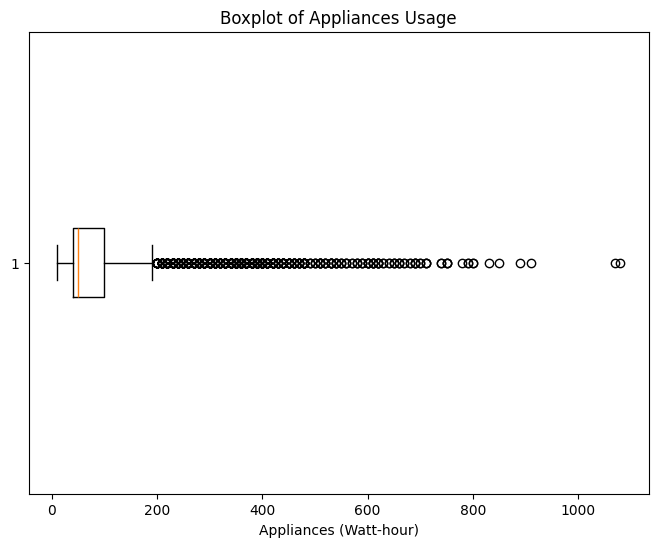

(547, -50.0, 190.0)

In [ ]:
import matplotlib.pyplot as plt

   # Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

     # Detect outliers in the 'Appliances' column
outliers_appliances, lower_bound, upper_bound = detect_outliers_iqr(df, 'Appliances')

     # Visualize the column with a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Appliances'], vert=False)
plt.title('Boxplot of Appliances Usage')
plt.xlabel('Appliances (Watt-hour)')
plt.show()

       # Print the number of outliers and bounds
len(outliers_appliances), lower_bound, upper_bound

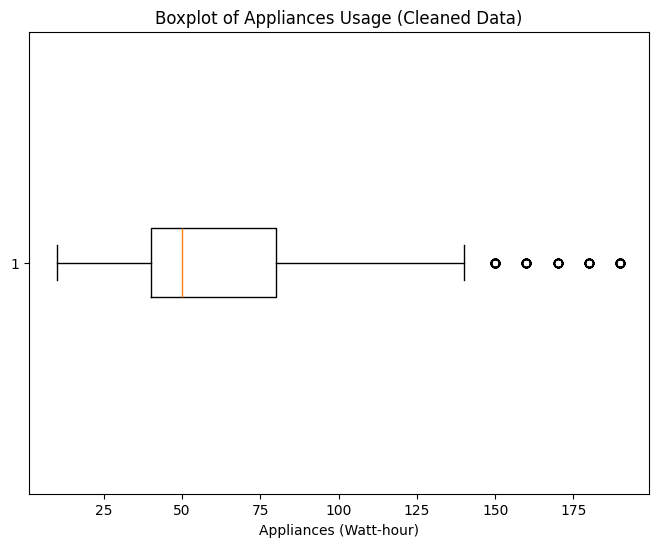

((4591, 29), (4044, 29))

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_data, lower_bound, upper_bound

  # Remove outliers from the 'Appliances' column
cleaned_data, lower_bound, upper_bound = remove_outliers_iqr(df, 'Appliances')

  # Visualize the cleaned data using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(cleaned_data['Appliances'], vert=False)
plt.title('Boxplot of Appliances Usage (Cleaned Data)')
plt.xlabel('Appliances (Watt-hour)')
plt.show()

     # Compare original and cleaned dataset sizes
df.shape, cleaned_data.shape

**7 .Skewness**

Skewness refers to the asymmetry in the distribution of data. If a distribution is skewed, it can affect the performance of machine learning models, especially those that assume normality (such as linear regression). Here’s how we check for skewness using histograms.

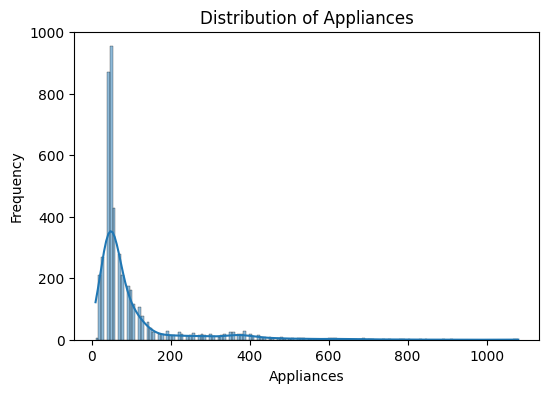

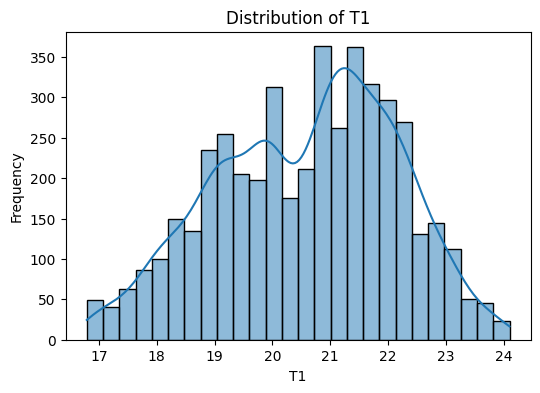

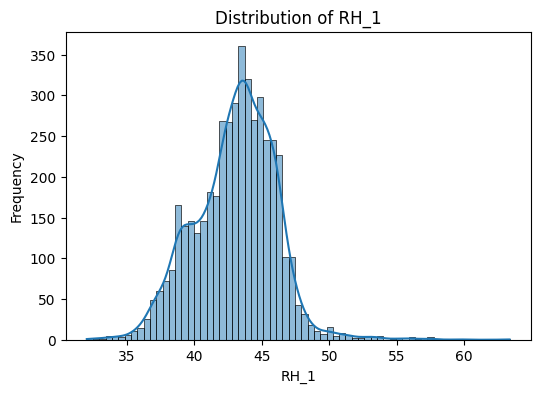

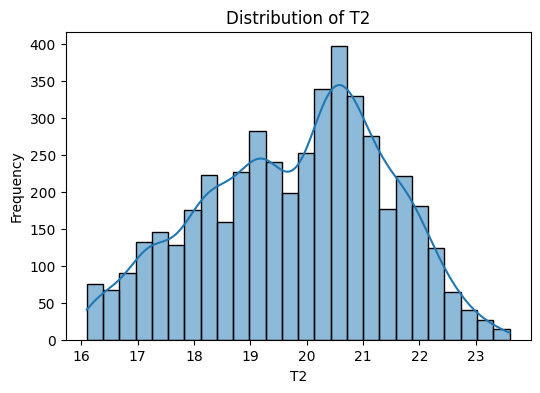

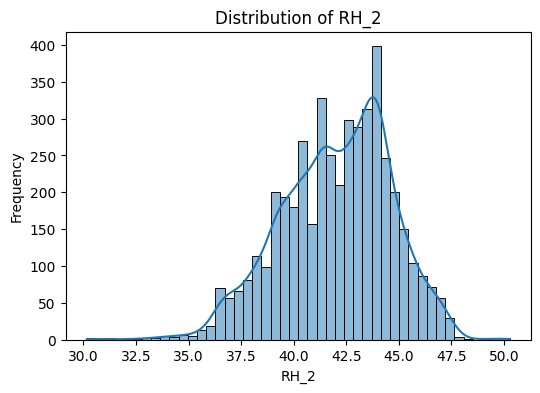

In [ ]:


numerical_cols = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2']

for col in numerical_cols:
    # Ensure the column data type is numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors

    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**8.Visualization**

Let’s create several graphs to explore different aspects of the data:

*a.Boxplot*

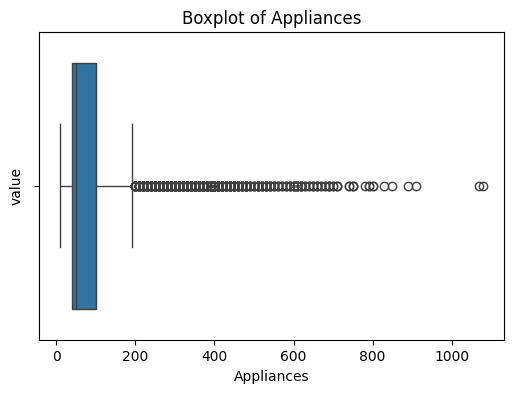

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Appliances'])
plt.title('Boxplot of Appliances')
plt.xlabel('Appliances')
plt.ylabel('value')
plt.show()

The box represents the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3) of the data. The line inside the box marks the median (50th percentile). Whiskers extend up to 1.5 times the IQR from the quartiles and show the range of most of the data. Any points outside the whiskers are plotted as individual dots, representing potential outliers—values significantly different from the majority. This plot helps to detect outliers and understand the central tendency and spread of energy consumption values in the Appliances column.

*b.Scatterplot*

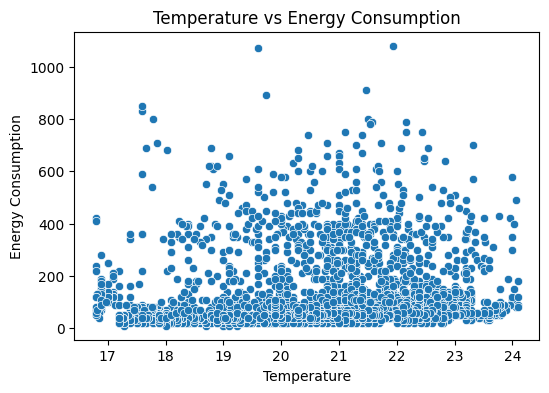

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['T1'], y=df['Appliances'])
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.show()

Scatter Plot Interpretation: Clusters or Patterns: Any visible patterns or clusters can indicate a relationship. For example, if points generally trend upwards (positive correlation) or downwards (negative correlation) as temperature changes, this would suggest a correlation.

Spread and Density: Areas where points are densely packed indicate frequent values, while sparse areas indicate less common combinations.

Outliers: Points far from the main cluster may suggest unusual temperature and energy consumption values.

This plot helps determine if Temperature (T1) has a linear, non-linear, or no visible impact on Energy Consumption (Appliances), providing insights for further analysis and modeling.

**c. Heatmap**

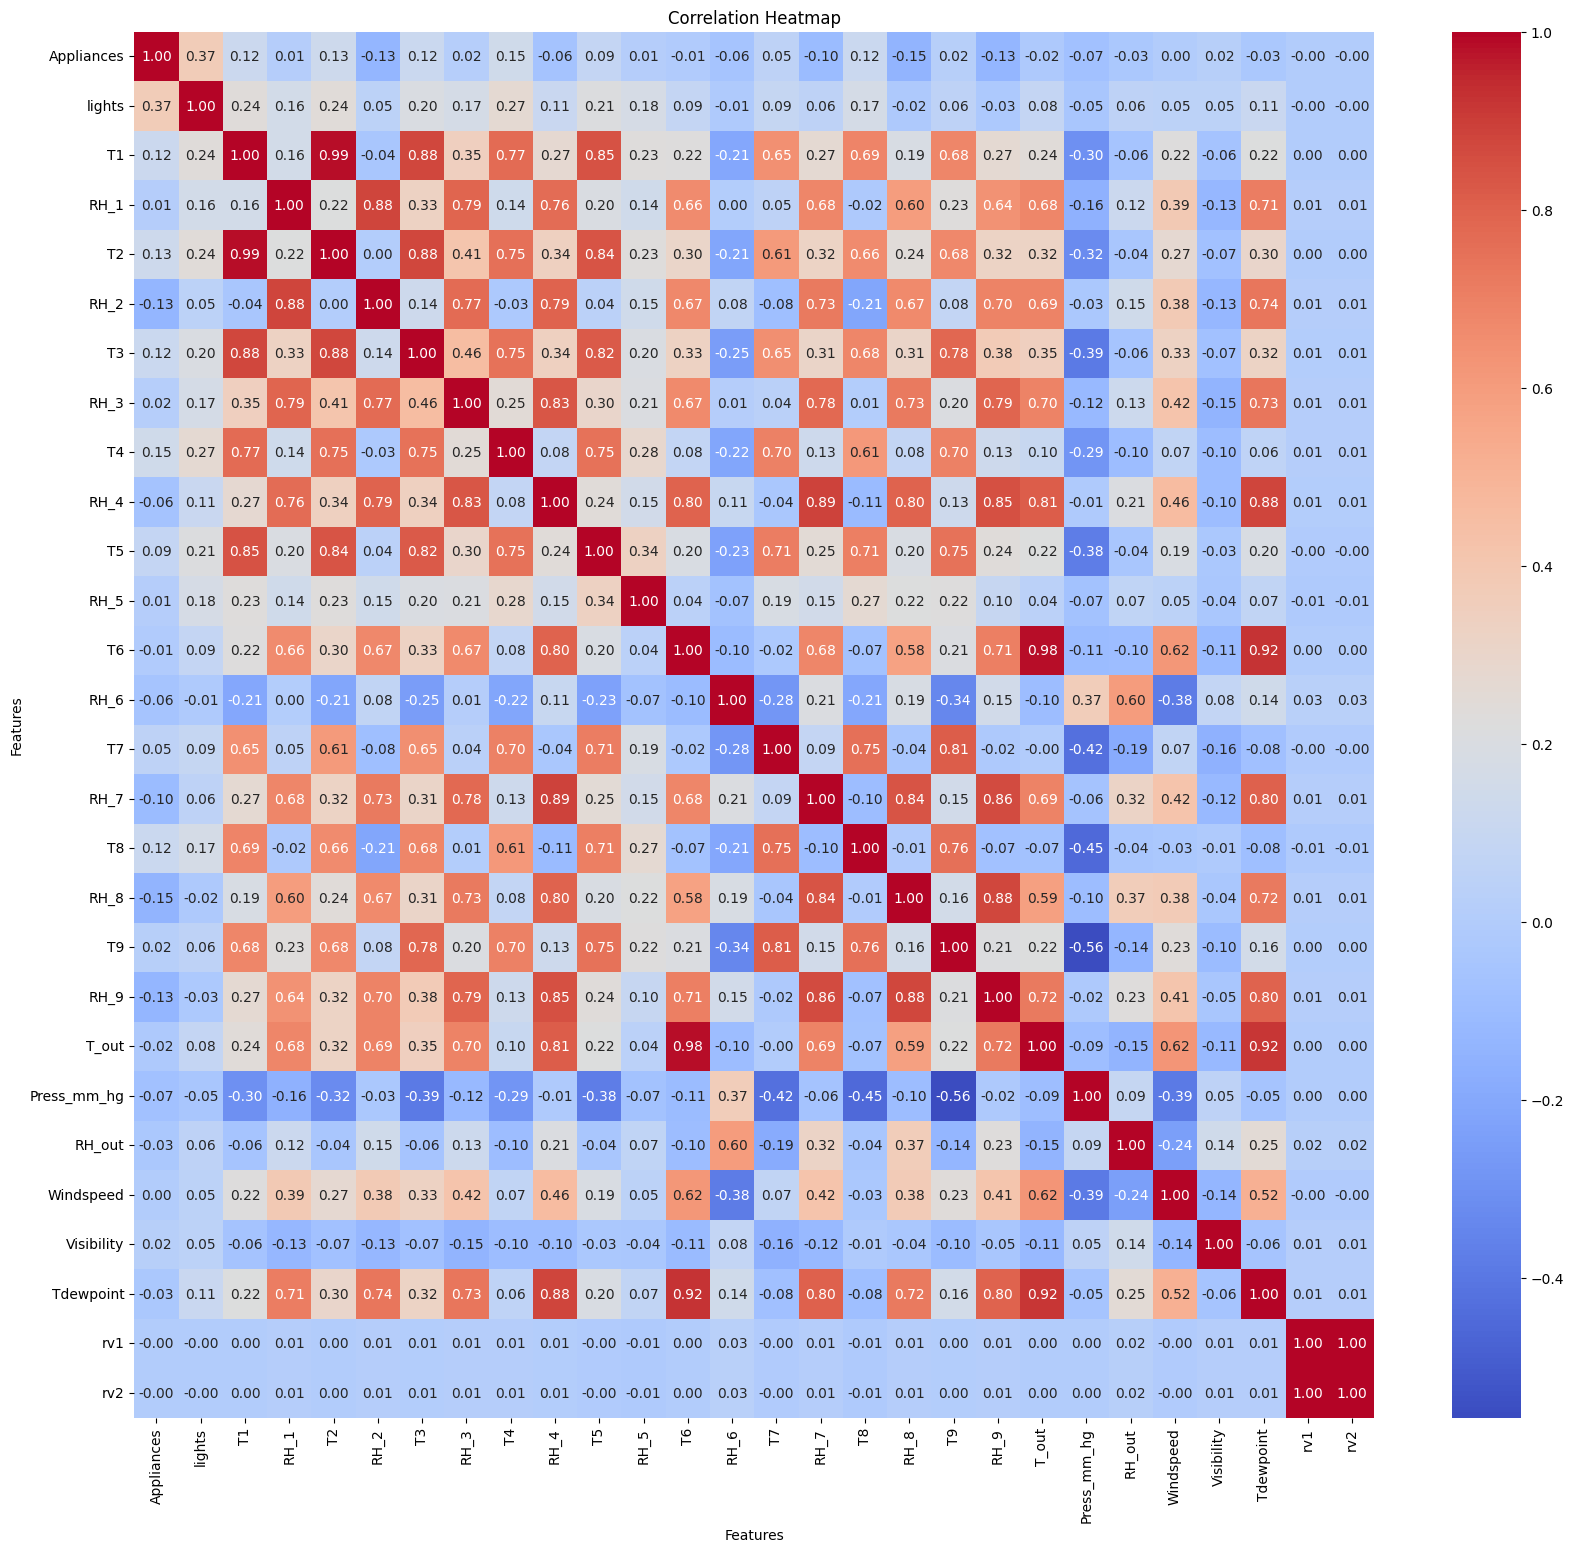

In [ ]:
#check for NaT (Not a Time) values, which indicate parsing failures
na_values = df['date'].isna().sum()
if na_values > 0:
    print(f"Found {na_values} invalid date entries. Consider further investigation and cleaning.")

numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 18))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M', errors='coerce')

*e . Pairplot*

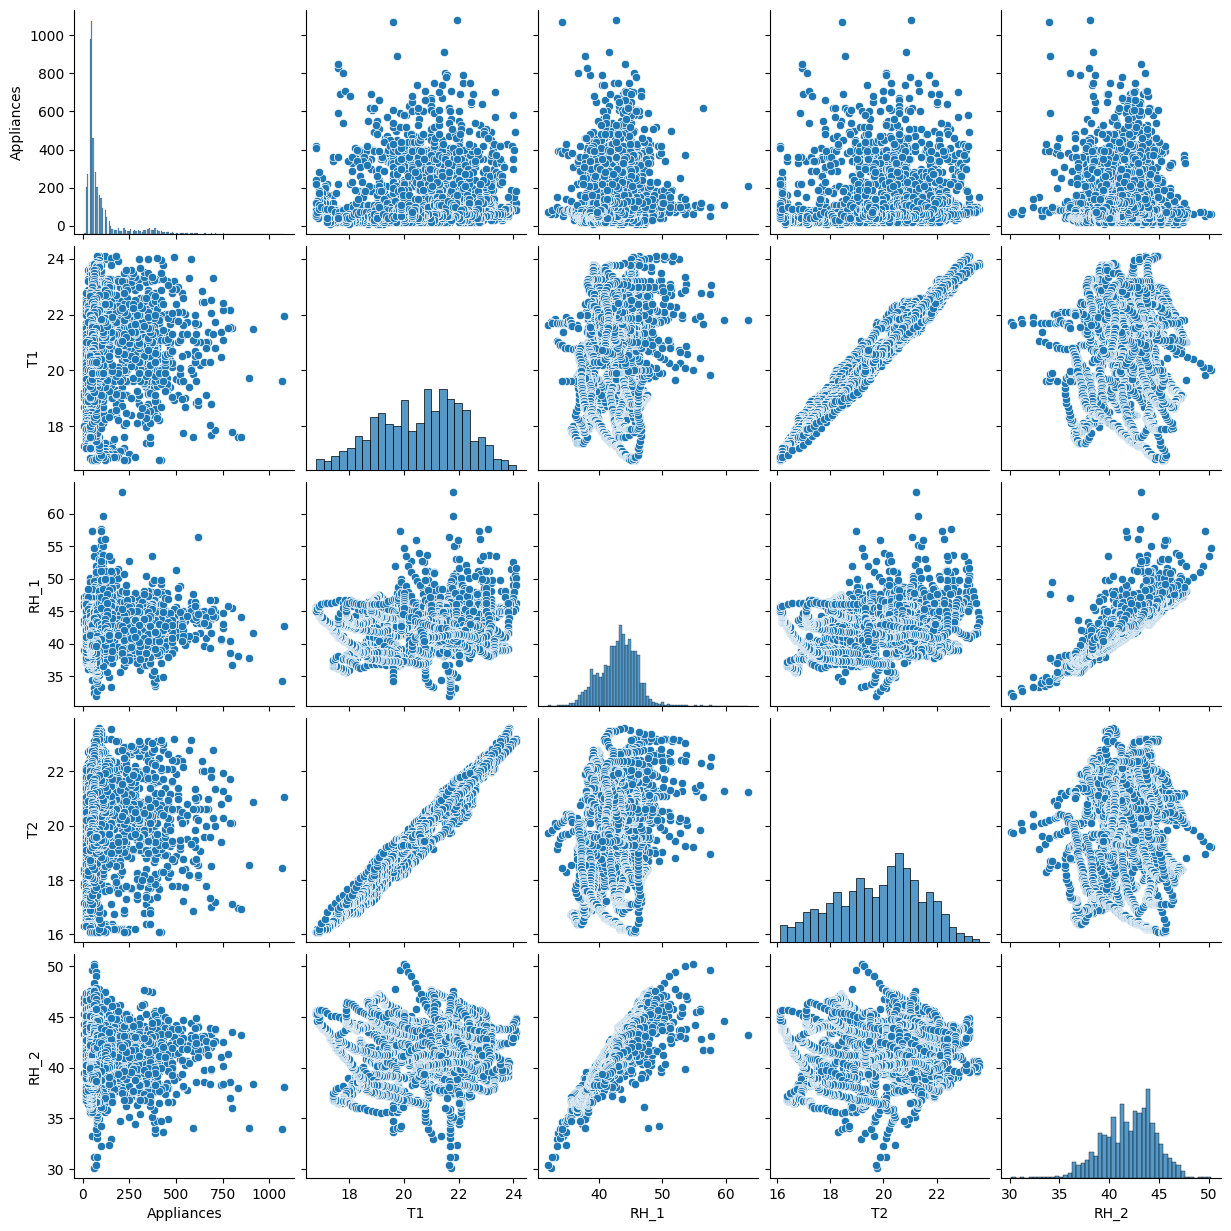

In [ ]:
sns.pairplot(df[['Appliances', 'T1', 'RH_1', 'T2', 'RH_2']])
plt.show()

*e .Barplot*

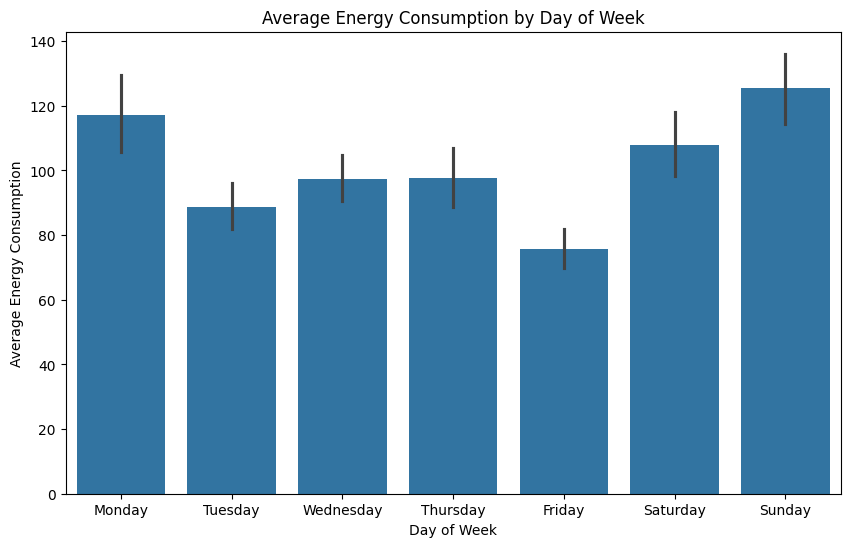

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='Appliances', data=df)
plt.title('Average Energy Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption')
plt.show()

**9. Remove Unnecessary Columns**

Before training a model, it's essential to remove irrelevant columns that don’t contribute to the prediction or have zero correlation with the target variable. This reduces noise and makes the model more efficient.

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

df['day_of_week'] = df['date'].dt.day_name()

columns_to_remove = correlation_matrix['Appliances'][correlation_matrix['Appliances'] == 0].index
df = df.drop(columns=columns_to_remove)

**10 .Encoding Categorical Variables**

In [ ]:
categorical_columns = ['date']

# Apply One-Hot Encoding to the categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

The output data_encoded is a new DataFrame where the date column has been replaced by several binary columns, each indicating the presence of a specific date. This transformation allows categorical data to be processed by models that require numerical inputs. However, this might create a large number of columns if date has many unique values (e.g., daily entries over years), which could make the dataset cumbersome and might require further dimensionality reduction.



**11. Feature Selection**

It is crucial to avoid overfitting and improve model performance. We can use techniques like correlation analysis, or recursive feature elimination (RFE) to select the most important features

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data_encoded' is your DataFrame from previous steps
X = data_encoded.drop(columns=['Appliances'])  # Define X (features)
y = data_encoded['Appliances']  # Define y (target)

# Remove non-numeric columns from X before scaling
X_numeric = X.select_dtypes(include=np.number)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X_numeric_imputed = imputer.fit_transform(X_numeric) # Impute missing values in X_numeric


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric_imputed) # Scale the imputed data


# Apply SelectKBest to find top 10 features
k = 10
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_scaled, y)


selected_features_indices = selector.get_support(indices=True)
selected_features_names = X_numeric.columns[selected_features_indices] # Use numeric columns for feature names
feature_scores = selector.scores_

selected_features_names, feature_scores[selected_features_indices]

(Index(['lights', 'T1', 'T2', 'RH_2', 'T3', 'T4', 'RH_7', 'T8', 'RH_8', 'RH_9'], dtype='object'),
 array([738.35046049,  67.4712576 ,  83.9836364 ,  80.22968039,
         63.79618333, 102.5365668 ,  48.56521998,  64.7836367 ,
        100.73203017,  80.1654304 ]))

**Correlation Heatmap:**

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


The output is a correlation heatmap displaying pairwise correlations among numerical features in the dataset:

Color Intensity: The intensity indicates the correlation strength. Darker colors represent stronger correlations, either positively or negatively.

Annotation: Each cell shows a numerical correlation value (ranging from -1 to 1), with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation.

Patterns: This heatmap helps identify strongly correlated features, which could lead to multicollinearity in models, and can guide feature selection by identifying features with little or no correlation to the target variable or each other

**12.Standardizing Features**
Standardization ensures that features have the same scale, which is especially important for models like SVM and linear regression that are sensitive to feature magnitude.

In [ ]:

print(df.columns)

selected_features = ['feature_column1', 'feature_column2', 'feature_column3']

selected_features = df.columns[[1, 2, 3]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_features])
